In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv("crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

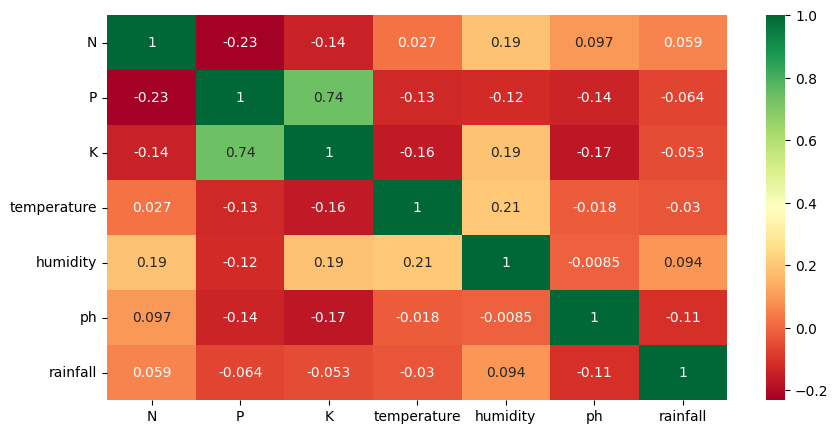

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
data.drop(['P', 'K'], inplace = True, axis = 1)
data

,N,temperature,humidity,ph,rainfall,label
0,90,20.879744,82.002744,6.502985,202.935536,rice
1,85,21.770462,80.319644,7.038096,226.655537,rice
2,60,23.004459,82.320763,7.840207,263.964248,rice
3,74,26.491096,80.158363,6.980401,242.864034,rice
4,78,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
2195,107,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,26.272418,52.127394,6.758793,127.175293,coffee


In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

In [15]:
# from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs         Score
4     rainfall  54808.131541
0            N  53144.698042
2     humidity  14755.489757
1  temperature   1092.422417
3           ph     74.886567


In [17]:
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model = scaler.fit(x_train)
x_train = model.transform(x_train)
x_test = model.transform(x_test)

In [20]:
accuracy = {}

In [35]:
print('----- RANDOM FOREST -----')
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
testlabel = rf.predict(x_test)
res = pd.DataFrame(list(zip(y_test, testlabel)), columns=["Actual Values", "Predictions"])

----- RANDOM FOREST -----


In [36]:
rf_acc= rf.score(x_test,y_test)
print("Accuracy: ",rf_acc*100,"%")
accuracy['Random Forest'] = rf_acc

Accuracy:  96.81818181818181 %


In [53]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1, leaf_size = 1)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [54]:
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
knn_acc = accuracy_score(y_test, y_pred)
accuracy["KNN"] = knn_acc
print(knn_acc)

0.9204545454545454


In [89]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [91]:
y_pred = dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
dt_acc = accuracy_score(y_test, y_pred)
accuracy["Decision Tree"] = dt_acc
print(dt_acc)

0.9352272727272727


In [92]:
lr_classifier = LogisticRegression(penalty='l2', random_state = 0)
lr_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [94]:
y_pred = lr_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
lr_acc = accuracy_score(y_test, y_pred)
accuracy["Logistic Regression"] = lr_acc
print(lr_acc)

0.7693181818181818


In [95]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [96]:
y_pred = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
nb_acc = accuracy_score(y_test, y_pred)
accuracy["Naive Bayes"] = nb_acc
print(nb_acc)

0.9636363636363636


In [98]:
all_accuracy = pd.DataFrame(list(accuracy.items()), columns = ['Models', 'Accuracy'])
all_accuracy

,Models,Accuracy
0,Random Forest,0.968182
1,KNN,0.920455
2,Decision Tree,0.935227
3,Logistic Regression,0.769318
4,Naive Bayes,0.963636


<AxesSubplot:>

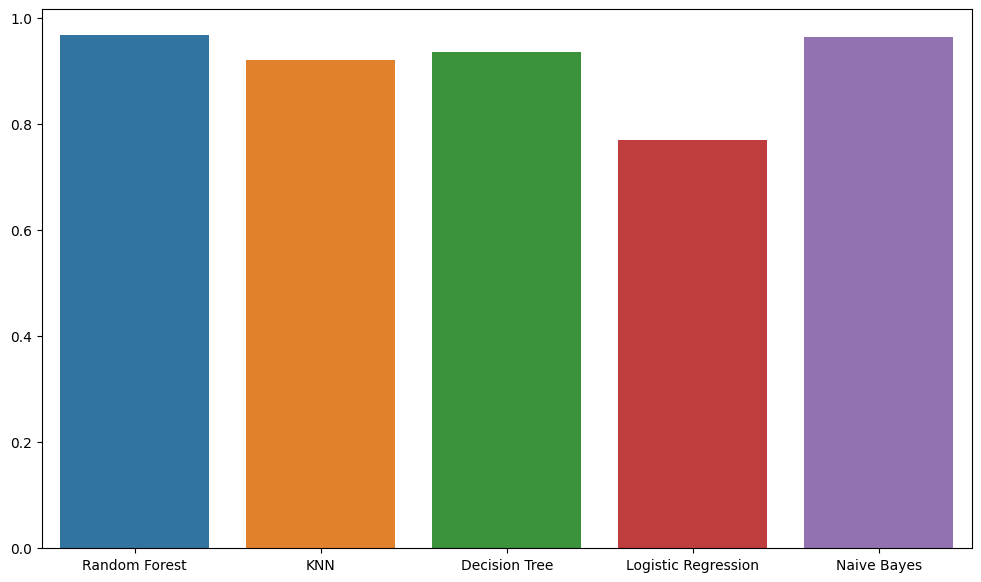

In [99]:
plt.figure(figsize=(12, 7))
sns.barplot(x = list(all_accuracy.Models), y = list(all_accuracy.Accuracy))

In [100]:
import joblib
joblib.dump(knn_classifier, 'crop_model.pkl')
joblib.dump(scaler, 'crop_scaler.pkl')

['crop_scaler.pkl']